In [36]:
#Necessary libraries to import
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
#Read json file
rd=pd.read_json("E:/Data scientist/Airbnb/sample_airbnb.json")
rd

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,guests_included,images,host,address,availability,review_scores,reviews,weekly_price,monthly_price,reviews_per_month
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"My cat, Samantha, are in and out during the su...","Conveniently located near 1, 2, 3, B & C subwa...",New York City!,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '454250', 'host_url': 'https://www...","{'street': 'New York, NY, United States', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '4351675', 'date': '2013-04-29 04:00:...",NaN,NaN,NaN
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,,Tram 5 minutes metro 10 minutes Bus 10 minutes,"We have bathroom,wc,İnternet in rooms and unde...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '52004703', 'host_url': 'https://w...","{'street': 'Fatih , İstanbul, Turkey', 'suburb...","{'availability_30': 30, 'availability_60': 60,...","{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '149469150', 'date': '2017-05-04 04:0...",NaN,NaN,NaN
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,"Clean, fully furnish, Spacious 1 bedroom flat ...",,,,,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51624384', 'host_url': 'https://w...","{'street': 'Hong Kong, Hong Kong Island, Hong ...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '56904633', 'date': '2015-12-19 05:00...",5000.0,NaN,NaN
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",Deposit of $1000 will be charged and will retu...,"Close to 3 different MTR Station, Sham shui Po...","Living Room , Kitchen and Toilet, All cooking ...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51744313', 'host_url': 'https://w...","{'street': 'Hong Kong , 九龍, Hong Kong', 'subur...","{'availability_30': 14, 'availability_60': 24,...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '57191745', 'date': '2015-12-22 05:00...",1350.0,5000.0,NaN
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,"WiFi, Apple TV with Netflix App (for use with ...",Travel Card 'Opal' travel cards work on all Sy...,You have full use of the entire studio and com...,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '13764143', 'host_url': 'https://w...","{'street': 'Surry Hills, NSW, Australia', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '123549502', 'date': '2016-12-29 05:0...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,,,,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51303748', 'host_u

In [38]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    5555 non-null   int64  
 1   listing_url            5555 non-null   object 
 2   name                   5555 non-null   object 
 3   summary                5555 non-null   object 
 4   space                  5555 non-null   object 
 5   description            5555 non-null   object 
 6   neighborhood_overview  5555 non-null   object 
 7   notes                  5555 non-null   object 
 8   transit                5555 non-null   object 
 9   access                 5555 non-null   object 
 10  interaction            5555 non-null   object 
 11  house_rules            5555 non-null   object 
 12  property_type          5555 non-null   object 
 13  room_type              5555 non-null   object 
 14  bed_type               5555 non-null   object 
 15  mini

In [39]:
rd.keys()

Index(['_id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'images', 'host', 'address',
       'availability', 'review_scores', 'reviews', 'weekly_price',
       'monthly_price', 'reviews_per_month'],
      dtype='object')

In [40]:
#Get the necessary data by data extraction
path="E:\Data scientist\Airbnb"
file=os.listdir(path)

airbnb=[]

for i in file:
    fpath=os.path.join(path,i)
    with open(fpath, 'r',encoding='latin-1') as filename:
        try:
            data_list = json.load(filename)
            if isinstance(data_list, list):
                for i in data_list:
                    info = {
                        "Listing_Id": i.get('_id'),
                        "Listing_url": i.get('listing_url'),
                        "Name": i.get('name'),
                        "Summary":i.get('summary'),
                        "Space":i.get('space'),
                        "Description": i.get('description'),
                        "Neighbourhood":i.get('neighborhood_overview'),
                        "Customer_notes":i.get('notes'),
                        "Transit":i.get('transit'),
                        "access":i.get('access'),
                        "interaction":i.get('interaction'),
                        "bathrooms":i.get('bathrooms'),
                        "monthly_price":i.get('monthly_price'),
                        "weekly_price":i.get('weekly_price'),                        
                        "House_rules": i.get('house_rules'),
                        "Property_type": i.get('property_type'),
                        "Room_type": i.get('room_type'),
                        "Bed_type": i.get('bed_type'),
                        "Min_nights": int(i.get('minimum_nights')),
                        "Max_nights": int(i.get('maximum_nights')),
                        "Cancellation_policy": i.get('cancellation_policy'),
                        "Accomodates": i.get('accommodates'),
                        "Total_bedrooms": i.get('bedrooms'),
                        "Total_beds": i.get('beds'),
                        "Availability": i.get('availability'),
                        "Availability_30": i['availability'].get('availability_30'),
                        "Availability_60": i['availability'].get('availability_60'),
                        "Availability_90": i['availability'].get('availability_90'),                        
                        "Availability_365": i['availability'].get('availability_365'),
                        "Price": float(i.get('price')),
                        "Security_deposit": i.get('security_deposit'),
                        "Cleaning_fee": i.get('cleaning_fee'),
                        "Extra_people": float(i.get('extra_people')),
                        "Guests_included": float(i.get('guests_included')),
                        "No_of_reviews": i.get('number_of_reviews'),
                        "Review_scores": i['review_scores'].get('review_scores_rating'),
                        "Review_scores_accuracy": i['review_scores'].get("review_scores_accuracy"),
                        "Review_scores_cleanliness": i['review_scores'].get("review_scores_cleanliness"),
                        "Review_scores_checkin": i['review_scores'].get("review_scores_checkin"),
                        "Review_scores_communication": i['review_scores'].get("review_scores_communication"),
                        "Review_scores_location": i['review_scores'].get("review_scores_location"),
                        "Review_scores_value": i['review_scores'].get("review_scores_value"),
                        "Amenities": ', '.join(i.get('amenities', [])),
                        "images":i['images'].get('picture_url'),
                        "Host_id": i['host'].get('host_id'),
                        "Host_name": i['host'].get('host_name'),
                        "Host_url": i['host'].get('host_url'),
                        "Host_location": i['host'].get('host_location'),
                        "Host_thumbnail_url": i['host'].get('host_thumbnail_url'),
                        "Host_response_rate": i['host'].get('host_response_rate'),
                        "Host_picture_url": i['host'].get('host_picture_url'),
                        "Host_neighbourhood": i['host'].get('host_neighbourhood'),
                        "Host_is_superhost": i['host'].get('host_is_superhost'),
                        "Host_has_profile_pic": i['host'].get('host_has_profile_pic'),
                        "Host_identity_verified": i['host'].get('host_identity_verified'),
                        "Host_listings_count": i['host'].get('host_listings_count'),
                        "Host_total_listings_count": i['host'].get('host_total_listings_count'),
                        "Host_verifications": i['host'].get('host_verifications'),
                        "Street": i['address'].get('street'),
                        "Country": i['address'].get('country'),
                        "Country_code": i['address'].get('country_code'),
                        "Location_type": i['address']['location'].get('type'),
                        "Longitude": i['address']['location']['coordinates'][0],
                        "Latitude": i['address']['location']['coordinates'][1],
                        "Is_location_exact": i['address']['location'].get('is_location_exact'),
                        "suburb": i['address'].get('suburb'),
                        "government_area": i['address'].get('government_area'),
                        "market": i['address'].get('market')
                    }
                    airbnb.append(info)

        except json.JSONDecodeError:
            print(f"error in opening json file:{fpath}")


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7940\1714860149.py:1: SyntaxWarning: invalid escape sequence '\D'
  path="E:\Data scientist\Airbnb"


error in opening json file:E:\Data scientist\Airbnb\airbnbout.py
error in opening json file:E:\Data scientist\Airbnb\airbnb_analysis.csv


In [41]:
#Convert the data into Dataframe
df1=pd.DataFrame(airbnb)
df1

,Listing_Id,Listing_url,Name,Summary,Space,Description,Neighbourhood,Customer_notes,Transit,access,...,Street,Country,Country_code,Location_type,Longitude,Latitude,Is_location_exact,suburb,government_area,market
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"My cat, Samantha, are in and out during the su...","Conveniently located near 1, 2, 3, B & C subwa...",New York City!,...,"New York, NY, United States",United States,US,Point,-73.965230,40.799620,False,Manhattan,Upper West Side,New York
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,,Tram 5 minutes metro 10 minutes Bus 10 minutes,"We have bathroom,wc,İnternet in rooms and unde...",...,"Fatih , İstanbul, Turkey",Turkey,TR,Point,28.980090,41.006200,False,Fatih,Fatih,Istanbul
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,"Clean, fully furnish, Spacious 1 bedroom flat ...",,,,,...,"Hong Kong, Hong Kong Island, Hong Kong",Hong Kong,HK,Point,114.150270,22.281580,True,Central & Western District,Central & Western,Hong Kong
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",Deposit of $1000 will be charged and will retu...,"Close to 3 different MTR Station, Sham shui Po...","Living Room , Kitchen and Toilet, All cooking ...",...,"Hong Kong , 九龍, Hong Kong",Hong Kong,HK,Point,114.166900,22.331400,True,Sham Shui Po District,Sham Shui Po,Hong Kong
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,"WiFi, Apple TV with Netflix App (for use with ...",Travel Card 'Opal' travel cards work on all Sy...,You have full use of the entire studio and com...,...,"Surry Hills, NSW, Australia",Australia,AU,Point,151.215540,-33.880290,True,Darlinghurst,Sydney,Sydney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,,,,...,"Kadıköy, İstanbul, Turkey",Turkey,TR,Point,29.030790,40.985630,False,Moda,Kadikoy,Istanbul
5551,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,"***NOTE: THE OCEAN INFINITY POOL (""POOL 1""0 WI...",Relax Hawaiian Style in Gated Community on Oce...,Location: Located at the south end of Lahaina ...,Puamana Resort requires a $10/day resort fee w...,You can walk to most attractions within Lahain...,Guests will have access to the 3 pools in the ...,...,"Lahaina, HI, United States",United States,US,Point,-156.667520,20.858940,False,Lahaina,Lahaina,Maui
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,,Newly renovated studio flat with full furniture.,,,,,...,"Hong Kong, Hong Kong Island, Hong Kong",Hong Kong,HK,Point,114.207220,22.291570,False,Quarry Bay,Eastern,Hong Kong
5553,9907907,https://www.airbnb.com/rooms/9907907,Large double room in Bondi,A bright large double room is available in a b...,,A bright large double room is available in a b...,,,The flat is exact

In [42]:
df1.isnull().sum()

Listing_Id           0
Listing_url          0
Name                 0
Summary              0
Space                0
                    ..
Latitude             0
Is_location_exact    0
suburb               0
government_area      0
market               0
Length: 68, dtype: int64

In [43]:
#Checking Null value columns
null_count=df1.isnull().sum()
column_with_null=null_count[null_count > 0]
column_with_null

bathrooms                        10
monthly_price                  4899
weekly_price                   4841
Total_bedrooms                    5
Total_beds                       13
Security_deposit               2084
Cleaning_fee                   1531
Review_scores                  1474
Review_scores_accuracy         1476
Review_scores_cleanliness      1473
Review_scores_checkin          1475
Review_scores_communication    1474
Review_scores_location         1474
Review_scores_value            1475
Host_response_rate             1388
dtype: int64

In [44]:
columns_to_fill=df1[["bathrooms","monthly_price","weekly_price","Total_bedrooms","Total_beds","Security_deposit","Cleaning_fee","Review_scores","Review_scores_accuracy","Review_scores_cleanliness","Review_scores_checkin","Review_scores_communication","Review_scores_location","Review_scores_value","Host_response_rate"]]
columns_to_fill

,bathrooms,monthly_price,weekly_price,Total_bedrooms,Total_beds,Security_deposit,Cleaning_fee,Review_scores,Review_scores_accuracy,Review_scores_cleanliness,Review_scores_checkin,Review_scores_communication,Review_scores_location,Review_scores_value,Host_response_rate
0,1.0,NaN,NaN,1.0,1.0,0.0,135.0,94.0,10.0,9.0,10.0,10.0,10.0,10.0,100.0
1,1.0,NaN,NaN,1.0,2.0,NaN,NaN,92.0,9.0,9.0,10.0,10.0,10.0,9.0,100.0
2,1.0,NaN,5000.0,1.0,2.0,NaN,NaN,100.0,10.0,10.0,10.0,10.0,10.0,8.0,NaN
3,1.0,5000.0,1350.0,1.0,1.0,0.0,50.0,92.0,10.0,8.0,10.0,10.0,10.0,10.0,100.0
4,1.0,NaN,NaN,0.0,1.0,300.0,50.0,95.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,1.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5551,2.0,NaN,NaN,2.0,4.0,200.0,315.0,92.0,10.0,9.0,10.0,10.0,10.0,9.0,99.0
5552,1.0,NaN,NaN,1.0,1.0,3000.0,NaN,85.0,10.0,9.0,10.0,10.0,10.0,9.0,60.0
5553,1.0,NaN,NaN,1.0,1.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df1.describe()

,bathrooms,monthly_price,weekly_price,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,Availability_30,Availability_60,...,Review_scores_cleanliness,Review_scores_checkin,Review_scores_communication,Review_scores_location,Review_scores_value,Host_response_rate,Host_listings_count,Host_total_listings_count,Longitude,Latitude
count,5545.000000,656.000000,714.000000,5555.000000,5.555000e+03,5555.000000,5550.000000,5542.000000,5555.000000,5555.000000,...,4082.000000,4080.000000,4081.000000,4081.000000,4080.000000,4167.000000,5555.000000,5555.000000,5555.000000,5555.000000
mean,1.291163,5391.370427,1530.903361,5.564356,1.382776e+06,3.505851,1.411712,2.071454,11.816202,26.451305,...,9.315287,9.699265,9.688312,9.601078,9.305147,93.118311,14.405761,14.405761,-6.623240,22.061230
std,0.702265,12723.569651,3185.916331,22.613861,5.256920e+07,2.297019,1.041942,1.619660,11.686113,23.476011,...,1.088492,0.784753,0.806155,0.759023,0.939855,18.541507,65.848868,65.848868,90.525974,28.092112
min,0.000000,250.000000,60.000000,1.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,-159.678690,-34.088290
25%,1.000000,1505.250000,480.250000,1.000000,5.900000e+01,2.000000,1.000000,1.000000,0.000000,0.000000,...,9.000000,10.000000,10.000000,9.000000,9.000000,98.000000,1.000000,1.000000,-73.599530,20.724390
50%,1.000000,2800.000000,800.000000,2.000000,1.125000e+03,3.000000,1.000000,2.000000,8.000000,23.000000,...,10.000000,10.000000,10.000000,10.000000,9.000000,100.000000,2.000000,2.000000,-8.611420,40.727130
75%,1.000000,4800.000000,1575.250000,3.000000,1.125000e+03,4.000000,2.000000,3.000000,24.000000,52.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,6.000000,6.000000,29.019605,41.162755
max,16.000000,253384.000000,59123.000000,1250.000000,2.147484e+09,16.000000,20.000000,25.000000,30.000000,60.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,1198.000000,1198.000000,151.338980,45.665630


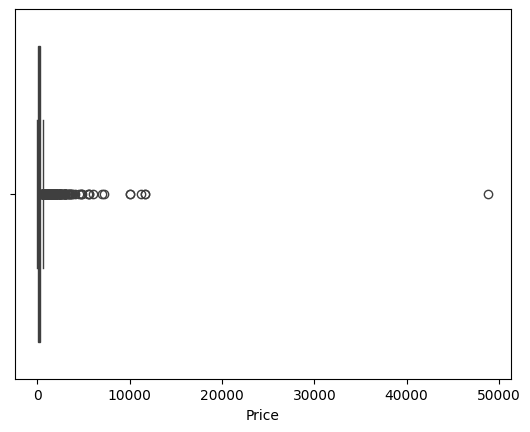

In [46]:
#Check for outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = df1['Price'])
plt.show()


In [47]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        

  return lower_range,upper_range

In [48]:
lower_bound, upper_bound = iqr_technique(df1['Price'])

df1 = df1[(df1.Price > lower_bound) & (df1.Price < upper_bound)]


(4981, 68)


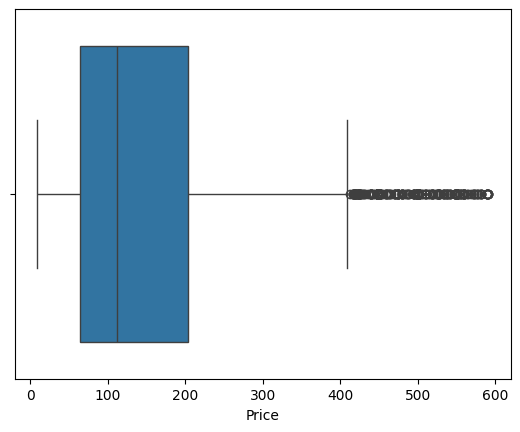

In [49]:
#Handling outliers
sns.boxplot(x = df1['Price'])
print(df1.shape)

In [50]:
print(df1['Price'].max())


591.0


In [51]:
mean_value=df1[["bathrooms","monthly_price","weekly_price","Total_bedrooms","Total_beds","Security_deposit","Cleaning_fee","Review_scores","Host_response_rate"]].mean()
mean_value

bathrooms                1.236832
monthly_price         3419.717608
weekly_price          1036.230653
Total_bedrooms           1.341439
Total_beds               1.965607
Security_deposit       336.795651
Cleaning_fee            77.559429
Review_scores           93.110609
Host_response_rate      93.273136
dtype: float64

In [52]:
df1=df1.fillna({'bathrooms':df1["bathrooms"].mean(),
            'monthly_price': df1["monthly_price"].mean(),
            'weekly_price': df1["weekly_price"].mean(),
            'Total_bedrooms': df1["Total_bedrooms"].mean(),
            'Total_beds': df1["Total_beds"].mean(),
            'Security_deposit': df1["Security_deposit"].mean(),
            'Cleaning_fee': df1["Cleaning_fee"].mean(),
            'Host_response_rate':df1["Host_response_rate"].mean(),
            'Review_scores': df1["Review_scores"].mean(),
})


In [55]:
null_count=df1.isnull().sum()
column_with_null=null_count[null_count > 0]
column_with_null

Review_scores_accuracy         1222
Review_scores_cleanliness      1219
Review_scores_checkin          1221
Review_scores_communication    1220
Review_scores_location         1220
Review_scores_value            1221
dtype: int64

In [56]:
columns_with_empty_strings = df1.eq('').any()
columns_with_empty_strings = columns_with_empty_strings[columns_with_empty_strings].index
print("Columns with empty strings:", columns_with_empty_strings.tolist())

Columns with empty strings: ['Name', 'Summary', 'Space', 'Description', 'Neighbourhood', 'Customer_notes', 'Transit', 'access', 'interaction', 'House_rules', 'Amenities', 'Host_location', 'Host_neighbourhood', 'suburb', 'market']


In [57]:
df1.replace({"Name":{'':'No Name Found'},
             "Summary": {'': 'No Data Found'},
             "Space": {'': ' No Data Found'},
             "Description": {'': 'No Data Found'},
             "Neighbourhood": {'': 'No Data Found'},
             "Customer_notes": {'': 'No Data Found'},
             "Transit": {'': 'No Data Found'},
             "access": {'': ' No Data Found'},
             "interaction": {'': ' No Data Found'},
             "House_rules": {'': 'No Data Found'},
             "Amenities": {'': 'No Data Found'},
             "Host_location": {'': 'No Data Found'},
             "Host_neighbourhood": {'': 'No Data Found'}, 
             "suburb": {'': 'No Data Found'}, 
             "market": {'': 'No Data Found'}
             }, inplace=True)

In [58]:
df1["Listing_Id"]=df1["Listing_Id"].astype(np.int64)
df1["Extra_people"]= df1["Extra_people"].astype(int)
df1["Total_bedrooms"]= df1["Total_bedrooms"].astype(int)
df1["bathrooms"]= df1["bathrooms"].astype(int)
df1["monthly_price"]= df1["monthly_price"].astype(int)
df1["weekly_price"]= df1["weekly_price"].astype(int)
df1["Total_beds"]= df1["Total_beds"].astype(int)
df1["Price"]= df1["Price"].astype(int)
df1["Security_deposit"]=df1["Security_deposit"].astype(int)
df1["Cleaning_fee"]= df1["Cleaning_fee"].astype(int)
df1["Guests_included"]= df1["Guests_included"].astype(int)
df1["Review_scores"]=df1["Review_scores"].astype(int)
df1["Host_id"]=df1["Host_id"].astype(np.int64)
df1["Review_scores_accuracy"]=df1["Host_id"].astype(np.float64)
df1["Review_scores_cleanliness"]=df1["Host_id"].astype(np.float64)
df1["Review_scores_checkin"]=df1["Host_id"].astype(np.float64)
df1["Review_scores_communication"]=df1["Host_id"].astype(np.float64)
df1["Review_scores_location"]=df1["Host_id"].astype(np.float64)
df1["Review_scores_value"]=df1["Host_id"].astype(np.float64)

In [59]:
df1[['Review_scores_accuracy','Review_scores_cleanliness','Review_scores_checkin','Review_scores_communication','Review_scores_location','Review_scores_value']]

,Review_scores_accuracy,Review_scores_cleanliness,Review_scores_checkin,Review_scores_communication,Review_scores_location,Review_scores_value
0,454250.0,454250.0,454250.0,454250.0,454250.0,454250.0
1,52004703.0,52004703.0,52004703.0,52004703.0,52004703.0,52004703.0
3,51744313.0,51744313.0,51744313.0,51744313.0,51744313.0,51744313.0
4,13764143.0,13764143.0,13764143.0,13764143.0,13764143.0,13764143.0
5,2649859.0,2649859.0,2649859.0,2649859.0,2649859.0,2649859.0
...,...,...,...,...,...,...
5549,2068687.0,2068687.0,2068687.0,2068687.0,2068687.0,2068687.0
5550,51303748.0,51303748.0,51303748.0,51303748.0,51303748.0,51303748.0
5551,51013381.0,51013381.0,51013381.0,51013381.0,51013381.0,51013381.0
5552,31386255.0,31386255.0,31386255.0,31386255.0,31386255.0,31386255.0


In [60]:
median_value=df1[['Review_scores_accuracy','Review_scores_cleanliness','Review_scores_checkin','Review_scores_communication','Review_scores_location','Review_scores_value']].median()
median_value

Review_scores_accuracy         37776205.0
Review_scores_cleanliness      37776205.0
Review_scores_checkin          37776205.0
Review_scores_communication    37776205.0
Review_scores_location         37776205.0
Review_scores_value            37776205.0
dtype: float64

In [61]:
df1.loc[(df1['Review_scores_accuracy'].isna())] = df1['Review_scores_accuracy'].median()
df1.loc[(df1['Review_scores_cleanliness'].isna())] = df1['Review_scores_cleanliness'].median()
df1.loc[(df1['Review_scores_checkin'].isna())] = df1['Review_scores_checkin'].median()
df1.loc[(df1['Review_scores_communication'].isna())] = df1['Review_scores_communication'].median()
df1.loc[(df1['Review_scores_location'].isna())] = df1['Review_scores_location'].median()
df1.loc[(df1['Review_scores_value'].isna())] = df1['Review_scores_value'].median()

In [62]:
df1['Property_type'].unique()

array(['Apartment', 'Bed and breakfast', 'Guesthouse', 'Hostel', 'Loft',
       'House', 'Condominium', 'Treehouse', 'Guest suite', 'Bungalow',
       'Serviced apartment', 'Townhouse', 'Villa', 'Cabin', 'Other',
       'Farm stay', 'Chalet', 'Boutique hotel', 'Cottage', 'Boat',
       'Earth house', 'Aparthotel', 'Resort', 'Tiny house',
       'Nature lodge', 'Hotel', 'Camper/RV', 'Casa particular (Cuba)',
       'Barn', 'Hut', 'Pension (South Korea)', 'Campsite', 'Castle',
       'Train'], dtype=object)

In [63]:
df1['Property_type']=df1['Property_type'].str.lower()
df1['Property_type'].unique()

array(['apartment', 'bed and breakfast', 'guesthouse', 'hostel', 'loft',
       'house', 'condominium', 'treehouse', 'guest suite', 'bungalow',
       'serviced apartment', 'townhouse', 'villa', 'cabin', 'other',
       'farm stay', 'chalet', 'boutique hotel', 'cottage', 'boat',
       'earth house', 'aparthotel', 'resort', 'tiny house',
       'nature lodge', 'hotel', 'camper/rv', 'casa particular (cuba)',
       'barn', 'hut', 'pension (south korea)', 'campsite', 'castle',
       'train'], dtype=object)

In [64]:
df1['Property_type'].tolist()

['apartment',
 'bed and breakfast',
 'guesthouse',
 'apartment',
 'hostel',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'loft',
 'apartment',
 'apartment',
 'house',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'house',
 'house',
 'condominium',
 'house',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'guesthouse',
 'apartment',
 'condominium',
 'loft',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'house',
 'condominium',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'treehouse',
 'house',
 'apartment',
 'guesthouse',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'guest suite',
 'apartment',
 'apartment',
 'apartment',
 'apartment',
 'condominium',
 'apartment',
 'apartment',
 'house',
 'house',
 'apartment',
 'apartment',
 'apartment',
 '

In [65]:
standard={'apartment':'apartment', 
            'bed and breakfast':'hostel', 
            'guesthouse':'house', 
            'hostel':'hostel',
            'serviced apartment':'apartment', 
            'loft':'hostel', 
            'house':'guesthouse', 
            'condominium':'apartment', 
            'treehouse':'treehouse',
            'guest suite':'guest suite', 
            'bungalow':'bungalow', 
            'townhouse':'house', 
            'villa':'villa', 
            'cabin':'cabin', 
            'other':'other',
            'farm stay':'farm stay', 
            'chalet':'cabin', 
            'boutique hotel':'hotel', 
            'cottage':'house', 
            'boat':'boat house',
            'earth house':'house', 
            'aparthotel':'apartment', 
            'resort':'resort', 
            'tiny house':'house',
            'nature lodge':'camp', 
            'hotel':'hotel', 
            'camper/rv':'camp', 
            'casa particular (cuba)':'casa particular (cuba)',
            'barn':'hut', 
            'hut':'hut', 
            'heritage hotel (india)':'heritage hotel (india)', 
            'pension (south korea)':'pension (south korea)',
            'campsite':'camp', 
            'castle':'castle', 
            'houseboat':'boat house', 
            'train':'train stay'
        }

In [66]:
#Converting dataframe to csv file
df1.to_csv("airbnb_analysis.csv", index=False)

In [67]:
df2=pd.read_csv("E:/Data scientist/Airbnb/airbnb_analysis.csv")
df2

,Listing_Id,Listing_url,Name,Summary,Space,Description,Neighbourhood,Customer_notes,Transit,access,...,Street,Country,Country_code,Location_type,Longitude,Latitude,Is_location_exact,suburb,government_area,market
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,No Data Found,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"My cat, Samantha, are in and out during the su...","Conveniently located near 1, 2, 3, B & C subwa...",New York City!,...,"New York, NY, United States",United States,US,Point,-73.96523,40.79962,False,Manhattan,Upper West Side,New York
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,No Data Found,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,No Data Found,Tram 5 minutes metro 10 minutes Bus 10 minutes,"We have bathroom,wc,İnternet in rooms and unde...",...,"Fatih , İstanbul, Turkey",Turkey,TR,Point,28.98009,41.00620,False,Fatih,Fatih,Istanbul
2,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",Deposit of $1000 will be charged and will retu...,"Close to 3 different MTR Station, Sham shui Po...","Living Room , Kitchen and Toilet, All cooking ...",...,"Hong Kong , 九龍, Hong Kong",Hong Kong,HK,Point,114.16690,22.33140,True,Sham Shui Po District,Sham Shui Po,Hong Kong
3,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,"WiFi, Apple TV with Netflix App (for use with ...",Travel Card 'Opal' travel cards work on all Sy...,You have full use of the entire studio and com...,...,"Surry Hills, NSW, Australia",Australia,AU,Point,151.21554,-33.88029,True,Darlinghurst,Sydney,Sydney
4,10112159,https://www.airbnb.com/rooms/10112159,Downtown Oporto Inn (room cleaning),"Tradicional building, with high ceilings next ...","Cozy, located near the most interesting points...","Tradicional building, with high ceilings next ...","Exciting, urban and dinamic, stay with us, nea...",No private parking.,"Next to Trindade subway station, and also to F...","It is a Inn with groundfloor and 1st floor, wi...",...,"Porto, Porto, Portugal",Portugal,PT,Point,-8.60867,41.15430,False,No Data Found,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Porto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,9969335,https://www.airbnb.com/rooms/9969335,"Central, Modern, University, Metro",Welcome to this completely new apartment and f...,No Data Found,Welcome to this completely new apartment and f...,No Data Found,No Data Found,No Data Found,No Data Found,...,"Porto, Porto, Portugal",Portugal,PT,Point,-8.60464,41.15908,True,No Data Found,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Porto
4977,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,No Data Found,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,No Data Found,No Data Found,No Data Found,No Data Found,...,"Kadıköy, İstanbul, Turkey",Turkey,TR,Point,29.03079,40.98563,False,Moda,Kadikoy,Istanbul
4978,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,"***NOTE: THE OCEAN INFINITY POOL (""POOL 1""0 WI...",Relax Hawaiian Style in Gated Community on Oce...,Location: Located at the south end of Lahaina ...,Puamana Resort requires a $10/day resort fee w..

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Listing_Id                   4981 non-null   int64  
 1   Listing_url                  4981 non-null   object 
 2   Name                         4981 non-null   object 
 3   Summary                      4981 non-null   object 
 4   Space                        4981 non-null   object 
 5   Description                  4981 non-null   object 
 6   Neighbourhood                4981 non-null   object 
 7   Customer_notes               4981 non-null   object 
 8   Transit                      4981 non-null   object 
 9   access                       4981 non-null   object 
 10  interaction                  4981 non-null   object 
 11  bathrooms                    4981 non-null   int64  
 12  monthly_price                4981 non-null   int64  
 13  weekly_price      

In [69]:
de=df2["Amenities"]    
de             

0       Internet, Wifi, Air conditioning, Kitchen, Ele...
1       Internet, Wifi, Air conditioning, Free parking...
2       TV, Wifi, Air conditioning, Kitchen, Elevator,...
3       TV, Wifi, Kitchen, Elevator, Heating, Washer, ...
4       TV, Cable TV, Wifi, Family/kid friendly, Smoke...
                              ...                        
4976    TV, Cable TV, Internet, Wifi, Kitchen, Free pa...
4977    TV, Cable TV, Internet, Wifi, Kitchen, Buzzer/...
4978    TV, Wifi, Air conditioning, Pool, Kitchen, Fre...
4979    TV, Wifi, Air conditioning, Kitchen, Elevator,...
4980    TV, Internet, Wifi, Kitchen, Washer, Dryer, Sm...
Name: Amenities, Length: 4981, dtype: object

In [71]:
ad=df2["Price"]
ad

0       135
1       121
2       181
3       181
4        40
       ... 
4976     41
4977    501
4978    220
4979    400
4980     60
Name: Price, Length: 4981, dtype: int64